In [2]:
from rdkit import Chem
from rdkit.Chem.Draw import rdMolDraw2D
from io import BytesIO
import numpy as np
from PIL import Image, ImageOps
def _drawerToImage(d2d):
    try:
        import Image
    except ImportError:
        from PIL import Image
    sio = BytesIO(d2d.GetDrawingText())
    return Image.open(sio)

def clourMol(mol,highlightAtoms_p=None,highlightAtomColors_p=None,highlightBonds_p=None,highlightBondColors_p=None,sz=[400,400],highlightAtomRadii_p=None):
    '''

    '''
    d2d = rdMolDraw2D.MolDraw2DCairo(sz[0], sz[1])
    op = d2d.drawOptions()
    op.dotsPerAngstrom = 20
    op.useBWAtomPalette()
    mc = rdMolDraw2D.PrepareMolForDrawing(mol)
    d2d.DrawMolecule(mc, legend='', highlightAtoms=highlightAtoms_p,highlightAtomColors=highlightAtomColors_p, highlightBonds= highlightBonds_p,highlightBondColors=highlightBondColors_p, highlightAtomRadii=highlightAtomRadii_p)
    d2d.FinishDrawing()
    product_img=_drawerToImage(d2d)
    return product_img
def StripAlphaFromImage(img):
    '''This function takes an RGBA PIL image and returns an RGB image'''

    if len(img.split()) == 3:
        return img
    return Image.merge('RGB', img.split()[:3])


def TrimImgByWhite(img, padding=10):
    '''This function takes a PIL image, img, and crops it to the minimum rectangle
    based on its whiteness/transparency. 5 pixel padding used automatically.'''

    # Convert to array
    as_array = np.array(img)  # N x N x (r,g,b,a)

    # Set previously-transparent pixels to white
    if as_array.shape[2] == 4:
        as_array[as_array[:, :, 3] == 0] = [255, 255, 255, 0]

    as_array = as_array[:, :, :3]

    # Content defined as non-white and non-transparent pixel
    has_content = np.sum(as_array, axis=2, dtype=np.uint32) != 255 * 3
    xs, ys = np.nonzero(has_content)

    # Crop down
    margin = 5
    x_range = max([min(xs) - margin, 0]), min([max(xs) + margin, as_array.shape[0]])
    y_range = max([min(ys) - margin, 0]), min([max(ys) + margin, as_array.shape[1]])
    as_array_cropped = as_array[
        x_range[0]:x_range[1], y_range[0]:y_range[1], 0:3]

    img = Image.fromarray(as_array_cropped, mode='RGB')

    return ImageOps.expand(img, border=padding, fill=(255, 255, 255))

In [3]:
from rdkit.Chem import PyMol
from rdkit import Chem
import sys
from IPython.display import SVG
from rdkit import rdBase
from rdkit.Chem import AllChem, DataStructs
from rdkit.Chem.Draw import DrawMorganBit, DrawMorganBits,DrawMorganEnv, IPythonConsole
def add_atom_index(mol):
    atoms = mol.GetNumAtoms()
    for i in range( atoms ):
        # mol.GetAtomWithIdx(i).SetProp('molAtomMapNumber', str(mol.GetAtomWithIdx(i).GetIdx()))
        mol.GetAtomWithIdx(i).SetProp('molAtomMapNumber', str(i))
    return mol,atoms

In [4]:
def create_dict(list_p):
    dict_p = {}
    for i in list_p:
        i = int(i)
        dict_p[i] = 0.5
    return dict_p

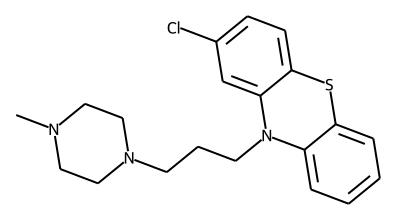

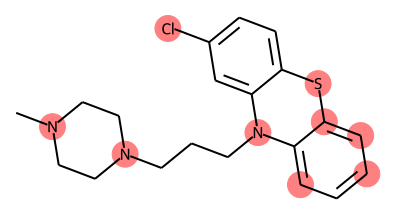

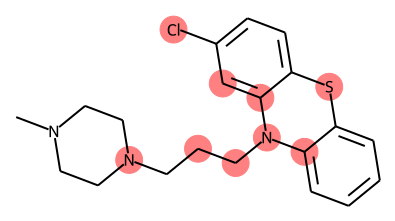

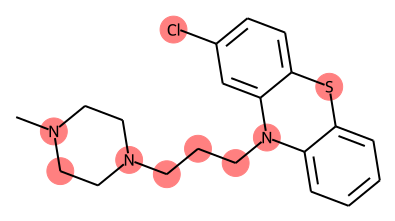

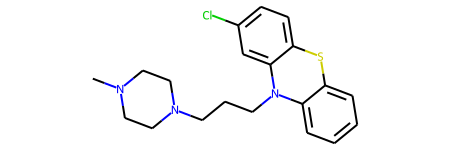

In [6]:
smi = 'CN1CCN(CCCN2c3ccccc3Sc3ccc(Cl)cc32)CC1'
mol =  Chem.MolFromSmiles(smi)
# mol,atoms = add_atom_index(mol)

img1 = clourMol(mol)
img1 =StripAlphaFromImage(img1)
img1 = TrimImgByWhite(img1)
display(img1)
#hight atoms
highlightAtoms_p=[15,4,8,13,14,1,12,10,20]
img1 = clourMol(mol,highlightAtoms_p=highlightAtoms_p,highlightAtomRadii_p=create_dict(highlightAtoms_p))
img1 =StripAlphaFromImage(img1)
img1 = TrimImgByWhite(img1)
display(img1)

highlightAtoms_p=[15,8,4,21,7,22,9,20,6]
img1 = clourMol(mol,highlightAtoms_p=highlightAtoms_p,highlightAtomRadii_p=create_dict(highlightAtoms_p))
img1 =StripAlphaFromImage(img1)
img1 = TrimImgByWhite(img1)
display(img1)

highlightAtoms_p=[8,15,4,7,6,1,5,20,24]

img1 = clourMol(mol,highlightAtoms_p=highlightAtoms_p,highlightAtomRadii_p=create_dict(highlightAtoms_p))
img1 =StripAlphaFromImage(img1)
img1 = TrimImgByWhite(img1)
display(img1)
# custom atom color
# img2=clourMol(mol,highlightAtoms_p=[1,2,3],highlightAtomColors_p={1:(0.2,0.3,1),2:(1,0.3,0.3)})
# img2=clourMol(mol,highlightAtoms_p=[1,2,3],highlightAtomColors_p={1:(0.5,0,0),2:(0.2,0,0),3:(0.3,0,0)})
# img2 =StripAlphaFromImage(img2)
# img2 = TrimImgByWhite(img2)
# display(img2)
# # hight bond
# img3 = clourMol(mol,highlightBonds_p=[1,2])
# img3 =StripAlphaFromImage(img3)
# img3 = TrimImgByWhite(img3)
# display(img3)
# # custom bond color
# img4 = clourMol(mol,highlightBonds_p=[1,2],highlightBondColors_p={1:(0.1,0.2,1),2:(1,0.3,0.3)})
# img4 = TrimImgByWhite(img4)
# display(img4)

# #all
# img5 = clourMol(mol,highlightAtoms_p=[1,2,3],highlightAtomColors_p={1:(0.2,0.3,1),2:(1,0.3,0.3)},highlightBonds_p=[1,2],highlightBondColors_p={1:(0.1,0.2,0.3),2:(0.1,0.3,0.3)})
# img5 = TrimImgByWhite(img5)
# display(img5)
mol